In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

df_ceny: pd.DataFrame = pd.read_csv("Prices/PL_CENY_NIEZB_RB_20190301_20190331_20200614080414.csv", sep=";", decimal=",")
df_zapotrzebowanie: pd.DataFrame = pd.read_csv("Load/PL_WYK_KSE_20190301_20190331_20190401010535.csv", encoding="cp1250", sep=";", decimal=",")

In [3]:
df_ceny["Data_i_Godzina"] = df_ceny["Data"].astype(str) + " - " + df_ceny["Godzina"].astype(str)
df_ceny

,Data,Godzina,CRO,CROs,CROz,Stan zakontraktowania,Niezbilansowanie,Data_i_Godzina
0,20190301,1,180.03,180.03,180.03,1495.84,1495.84,20190301 - 1
1,20190301,2,180.15,180.15,180.15,1382.85,1382.85,20190301 - 2
2,20190301,3,180.15,180.15,180.15,1365.39,1365.39,20190301 - 3
3,20190301,4,180.27,180.27,180.27,1223.55,1223.55,20190301 - 4
4,20190301,5,183.00,183.00,183.00,1053.94,1053.94,20190301 - 5
...,...,...,...,...,...,...,...,...
738,20190331,20,241.57,241.57,241.57,646.70,736.70,20190331 - 20
739,20190331,21,257.81,257.81,257.81,529.32,619.32,20190331 - 21
740,20190331,22,241.57,241.57,241.57,730.41,820.41,20190331 - 22
741,20190331,23,221.04,221.04,221.04,930.14,930.14,20190331 - 23


In [4]:
df_zapotrzebowanie["Data_i_Godzina"] = df_zapotrzebowanie["Data"].astype(str) + " - " + df_zapotrzebowanie["Godzina"].astype(str)
df_zapotrzebowanie["Dzień tygodnia"] = df_zapotrzebowanie["Data"].astype(str).apply(lambda x: pd.Timestamp(x).day_of_week)
df_zapotrzebowanie

,Data,Godzina,Krajowe zapotrzebowanie na moc,Sumaryczna generacja JWCD,Generacja PI,Generacja IRZ,Sumaryczna generacja nJWCD,Krajowe saldo wymiany międzysystemowej równoległej,Krajowe saldo wymiany międzysystemowej nierównoległej,Data_i_Godzina,Dzień tygodnia
0,2019-03-01,1,17834.413,9622.938,-8.238,69.700,7468.438,418.250,345.513,2019-03-01 - 1,4
1,2019-03-01,2,17408.938,9686.263,-8.763,69.650,7205.213,460.900,77.388,2019-03-01 - 2,4
2,2019-03-01,3,17195.600,9726.050,-7.463,69.813,7085.700,454.450,-52.988,2019-03-01 - 3,4
3,2019-03-01,4,17304.163,10138.188,-206.550,69.600,6808.613,525.438,52.038,2019-03-01 - 4,4
4,2019-03-01,5,17533.250,10455.950,-320.650,69.825,6624.150,476.600,303.813,2019-03-01 - 5,4
...,...,...,...,...,...,...,...,...,...,...,...
738,2019-03-31,20,18097.938,9672.425,123.213,0.000,6775.400,383.663,1277.863,2019-03-31 - 20,6
739,2019-03-31,21,18774.000,10261.675,106.525,0.000,6719.713,469.050,1332.538,2019-03-31 - 21,6
740,2019-03-31,22,17979.813,9284.038,16.725,0.000,6838.138,541.350,1332.250,2019-03-31 - 22,6
741,2019-03-31,23,17091.150,8487.425,-8.475,0.000,6781.750,515.250,1322.800,2019-03-31 - 23,6


<AxesSubplot:xlabel='Data_i_Godzina'>

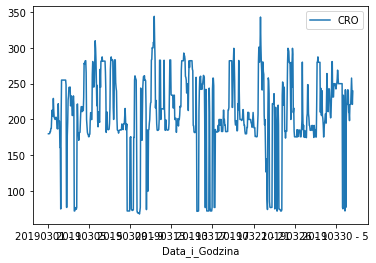

In [5]:
df_ceny.plot("Data_i_Godzina", "CRO")

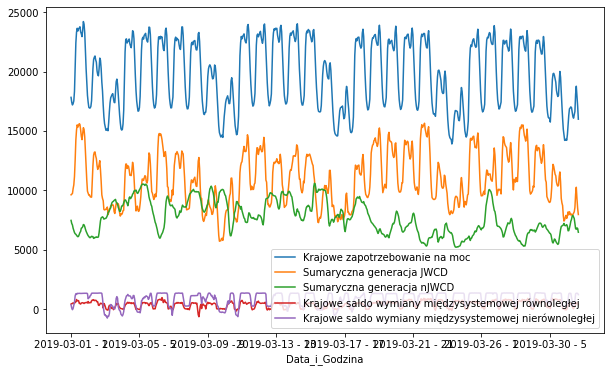

In [6]:
df_zapotrzebowanie.plot("Data_i_Godzina", ["Krajowe zapotrzebowanie na moc", "Sumaryczna generacja JWCD", "Sumaryczna generacja nJWCD", 
                                           "Krajowe saldo wymiany międzysystemowej równoległej", 
                                           "Krajowe saldo wymiany międzysystemowej nierównoległej"], figsize=(10, 6))
plt.legend(loc="lower right")
plt.show()

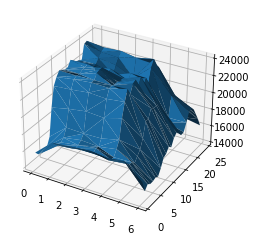

In [7]:
# X, Y = np.meshgrid(df_zapotrzebowanie["Dzień tygodnia"], df_zapotrzebowanie["Godzina"])
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(df_zapotrzebowanie["Dzień tygodnia"], df_zapotrzebowanie["Godzina"], df_zapotrzebowanie["Krajowe zapotrzebowanie na moc"], linewidth=0.2)
plt.show()

In [8]:
df_pogoda: pd.DataFrame = pd.read_csv("Temp_wind/k_d_t_03_2019.csv", encoding="cp1250", parse_dates=[[2, 3, 4]], header=None)
df_pogoda = df_pogoda.set_axis(["Data", "Kod stacji", "Nazwa", "Temperatura", "Status temp", "Wilgotność", "Status wil",
                    "Prędkość wiatru", "Status pr", "Zachmurzenie", "Status zach"], axis=1)
df_pogoda

,Data,Kod stacji,Nazwa,Temperatura,Status temp,Wilgotność,Status wil,Prędkość wiatru,Status pr,Zachmurzenie,Status zach
0,2019-03-01,249180010,PSZCZYNA,6.1,NaN,0.0,8.0,0.0,8.0,8.0,NaN
1,2019-03-02,249180010,PSZCZYNA,1.7,NaN,0.0,8.0,0.0,8.0,5.3,NaN
2,2019-03-03,249180010,PSZCZYNA,5.4,NaN,0.0,8.0,0.0,8.0,6.3,NaN
3,2019-03-04,249180010,PSZCZYNA,10.5,NaN,0.0,8.0,0.0,8.0,7.3,NaN
4,2019-03-05,249180010,PSZCZYNA,5.4,NaN,0.0,8.0,0.0,8.0,6.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2072,2019-03-27,254220090,OLECKO,1.8,NaN,0.0,8.0,0.0,8.0,6.0,NaN
2073,2019-03-28,254220090,OLECKO,3.8,NaN,0.0,8.0,0.0,8.0,8.0,NaN
2074,2019-03-29,254220090,OLECKO,6.2,NaN,0.0,8.0,0.0,8.0,5.3,NaN
2075,2019-03-30,254220090,OLECKO,9.7,NaN,0.0,8.0,0.0,8.0,5.7,NaN


In [9]:
df_pogoda["Nazwa"].unique()

array(['PSZCZYNA', 'BRENNA', 'ZAWOJA', 'LALIKI', 'JABŁONKA',
       'POLANA CHOCHOŁOWSKA', 'RADZIECHOWY', 'ŁAZY', 'JASTRZĘBIA',
       'LIMANOWA', 'PTASZKOWA', 'ŁĄCKO', 'MIZERNA', 'KROŚCIENKO',
       'NIEDZICA', 'KRYNICA', 'BUKOWINA TATRZAŃSKA', 'MUSZYNA',
       'DOLINA PIĘCIU STAWÓW', 'PIWNICZNA', 'PORONIN', 'MSZANA DOLNA',
       'DYNÓW', 'SOLINA-JAWOR', 'KOMAŃCZA', 'TERKA', 'TARNÓW',
       'DRONIOWICE', 'SILNICZKA', 'LGOTA GÓRNA', 'KRAKÓW-OBSERWATORIUM',
       'BORUSOWA', 'ŚWIĘTY KRZYŻ', 'STASZÓW', 'CHORZELÓW', 'ZAWADA',
       'JAROCIN', 'CIESZANÓW', 'STRZYŻÓW', 'CEBER', 'RADZYŃ', 'SMOLICE',
       'PUCZNIEW', 'SKIERNIEWICE', 'JARCZEW', 'PUŁAWY', 'GORZYŃ',
       'BABIMOST', 'WIELICHOWO', 'KÓRNIK', 'KOŁUDA WIELKA', 'LEGIONOWO',
       'WARSZAWA-BIELANY', 'WARSZAWA-FILTRY', 'PUŁTUSK',
       'WARSZAWA-OBSERWATORIUM II', 'SZEPIETOWO', 'BIAŁOWIEŻA',
       'GOLENIÓW', 'CHRZĄSTOWO', 'BIEBRZA-PIEŃCZYKÓWEK', 'MARIANOWO II',
       'RÓŻANYSTOK', 'BORUCINO', 'GDAŃSK-RĘBIECHOWO',
      

In [10]:
important_columns = ["Status temp", "Status pr"]
for col_name in important_columns:
    print(df_pogoda[col_name].notna().sum())

31
527


In [11]:
df_pogoda_filter = df_pogoda.loc[(df_pogoda["Status temp"] != 8.0) & (df_pogoda["Status pr"] != 8.0)]
df_pogoda_filter

,Data,Kod stacji,Nazwa,Temperatura,Status temp,Wilgotność,Status wil,Prędkość wiatru,Status pr,Zachmurzenie,Status zach
62,2019-03-01,249190350,ZAWOJA,3.6,NaN,0.0,8.0,0.7,NaN,8.0,NaN
63,2019-03-02,249190350,ZAWOJA,-1.9,NaN,0.0,8.0,0.3,NaN,1.3,NaN
64,2019-03-03,249190350,ZAWOJA,3.2,NaN,0.0,8.0,2.0,NaN,5.3,NaN
65,2019-03-04,249190350,ZAWOJA,9.3,NaN,0.0,8.0,5.0,NaN,5.3,NaN
66,2019-03-05,249190350,ZAWOJA,4.1,NaN,0.0,8.0,2.0,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2041,2019-03-27,254200080,LIDZBARK WARMIŃSKI,2.7,NaN,84.8,NaN,3.7,NaN,4.7,NaN
2042,2019-03-28,254200080,LIDZBARK WARMIŃSKI,6.3,NaN,81.8,NaN,0.7,NaN,4.3,NaN
2043,2019-03-29,254200080,LIDZBARK WARMIŃSKI,7.9,NaN,75.3,NaN,5.3,NaN,4.0,NaN
2044,2019-03-30,254200080,LIDZBARK WARMIŃSKI,9.8,NaN,77.0,NaN,3.7,NaN,2.7,NaN


In [12]:
df_pogoda_srednia = df_pogoda_filter[["Data", "Temperatura", "Prędkość wiatru"]]
df_pogoda_srednia = df_pogoda_srednia.groupby("Data").mean().reset_index()  # Mean of the stations
df_pogoda_srednia.set_index("Data", inplace=True)
df_pogoda_srednia

,Temperatura,Prędkość wiatru
Data,,
2019-03-01,2.738,2.794
2019-03-02,-1.428,1.696
2019-03-03,2.770,3.388
2019-03-04,8.984,4.186
2019-03-05,5.598,5.268
2019-03-06,3.796,2.538
2019-03-07,7.446,3.682
2019-03-08,8.304,4.688
2019-03-09,4.844,3.948


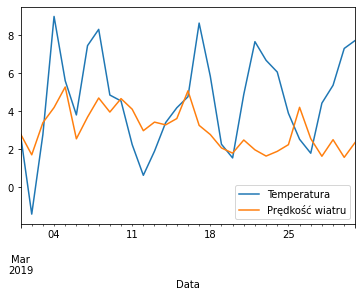

In [13]:
df_pogoda_srednia.plot(y=["Temperatura", "Prędkość wiatru"], use_index=True)
plt.show()

In [25]:
df_naslonecznienie_srednia

,time,Gb(i),Gd(i),Gr(i),T2m,WS10m,G(i)
0,2020-01-01 00:10:00,0.0,0.0,0.0,3.11,4.76,0.0
1,2020-01-01 01:10:00,0.0,0.0,0.0,2.72,4.34,0.0
2,2020-01-01 02:10:00,0.0,0.0,0.0,2.54,4.07,0.0
3,2020-01-01 03:10:00,0.0,0.0,0.0,2.30,3.86,0.0
4,2020-01-01 04:10:00,0.0,0.0,0.0,2.09,3.66,0.0
...,...,...,...,...,...,...,...
8779,2020-12-31 19:10:00,0.0,0.0,0.0,1.18,0.97,0.0
8780,2020-12-31 20:10:00,0.0,0.0,0.0,0.81,0.97,0.0
8781,2020-12-31 21:10:00,0.0,0.0,0.0,0.63,0.83,0.0
8782,2020-12-31 22:10:00,0.0,0.0,0.0,0.15,0.90,0.0


2020-01-01 00:10:00


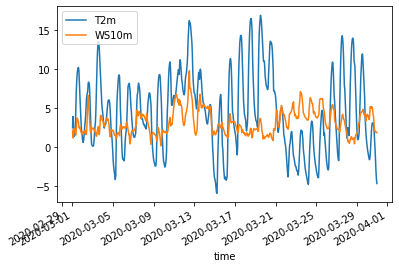

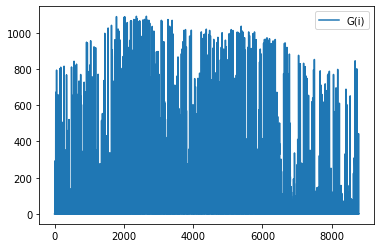

In [27]:
df_naslonecznienie: pd.DataFrame = pd.read_csv("Weather/Krakow.csv", header=6, skipfooter=11, engine="python")
df_naslonecznienie_srednia = df_naslonecznienie.loc[:, ["time", "Gb(i)", "Gd(i)", "Gr(i)", "T2m", "WS10m"]]
df_naslonecznienie_srednia["G(i)"] = df_naslonecznienie_srednia[["Gb(i)", "Gd(i)", "Gr(i)"]].sum(axis=1)
df_naslonecznienie_srednia["time"] = df_naslonecznienie_srednia["time"].apply(datetime.datetime.strptime, args=("%Y%m%d:%H%M", ))
print(df_naslonecznienie_srednia["time"][0])
df_naslonecznienie_marzec = df_naslonecznienie_srednia.loc[df_naslonecznienie_srednia["time"].between(datetime.datetime(2020, 3, 1), datetime.datetime(2020, 3, 31), inclusive="both")]
df_naslonecznienie_marzec.plot(y=["T2m", "WS10m"], x="time")
plt.show()
df_naslonecznienie_srednia.plot(y="G(i)", use_index=True)
plt.show()

In [28]:
df_naslonecznienie_marzec[df_naslonecznienie_marzec["G(i)"] == 0].count()

time     381
Gb(i)    381
Gd(i)    381
Gr(i)    381
T2m      381
WS10m    381
G(i)     381
dtype: int64